<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_IA_L%C3%B3gica_Difusa_(Fuzzy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.7/dist-packages (0.4.2)


In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

fuzz.__version__

'0.4.2'

# Problema da Gorjeta

Vamos criar um sistema de controle difuso que modele como você pode escolher dar uma gorjeta em um restaurante. 

Na hora da gorjeta, você leva em consideração o atendimento e a qualidade da comida, avaliada entre 0 a 10. 

Você usa para deixar uma gorjeta entre 0% a 25%.

---

- Variáveis reais
 - Serviço: 0 a 10 - entrada
 - Qualidade: 0 a 10 - entrada
 - Gorjeta: 0 a 25% - saída
- Conjuntos Difusos
 - Serviço: baixo, médio, alto
 - Qualidade: baixo, médio, alto
 - Gorjeta: baixo, médio, alto
- Regras
 - SE o serviço foi alto ou a qualidade da comida era alta, ENTÃO a gorjeta será alta.
 - SE o serviço foi médio ENTÃO a gorjeta será médio
 - SE o serviço era baixo e a qualidade da comida era baixo ENTÃO a gorjeta será baixa.

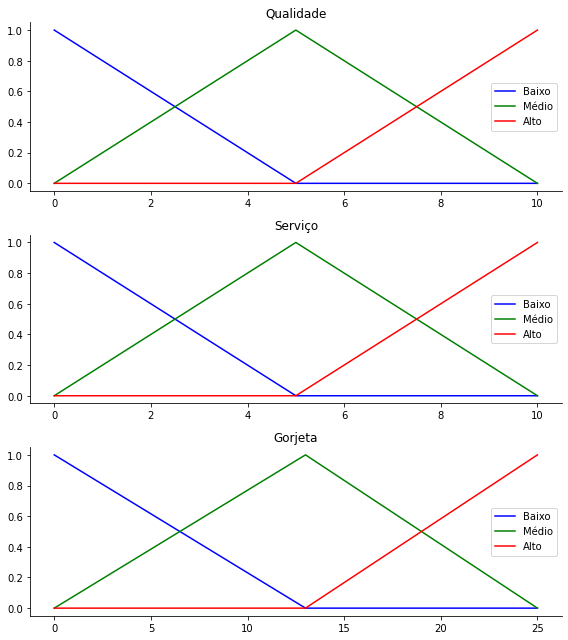

In [22]:
# variáveis reais
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_gor = np.arange(0, 26, 1)

# Funções de pertinência difusa (FPD)
qual_b = fuzz.trimf(x_qual, [0, 0, 5])
qual_m = fuzz.trimf(x_qual, [0, 5, 10])
qual_a = fuzz.trimf(x_qual, [5, 10, 10])
serv_b = fuzz.trimf(x_serv, [0, 0, 5])
serv_m = fuzz.trimf(x_serv, [0, 5, 10])
serv_a = fuzz.trimf(x_serv, [5, 10, 10])
gorj_b = fuzz.trimf(x_gor, [0, 0, 13])
gorj_m = fuzz.trimf(x_gor, [0, 13, 25])
gorj_a = fuzz.trimf(x_gor, [13, 25, 25])

# visualizando as funções de pertinência difusa
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_b, 'b', linewidth=1.5, label='Baixo')
ax0.plot(x_qual, qual_m, 'g', linewidth=1.5, label='Médio')
ax0.plot(x_qual, qual_a, 'r', linewidth=1.5, label='Alto')
ax0.set_title('Qualidade')
ax0.legend()

ax1.plot(x_serv, serv_b, 'b', linewidth=1.5, label='Baixo')
ax1.plot(x_serv, serv_m, 'g', linewidth=1.5, label='Médio')
ax1.plot(x_serv, serv_a, 'r', linewidth=1.5, label='Alto')
ax1.set_title('Serviço')
ax1.legend()

ax2.plot(x_gor, gorj_b, 'b', linewidth=1.5, label='Baixo')
ax2.plot(x_gor, gorj_m, 'g', linewidth=1.5, label='Médio')
ax2.plot(x_gor, gorj_a, 'r', linewidth=1.5, label='Alto')
ax2.set_title('Gorjeta')
ax2.legend()

# Removendo os eixos superior e direito
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [28]:
# Aplicando valores reais as entradas e gerando as pertinências
Qualidade = 6.5
Servico = 9.8
print('Qualidade =',Qualidade, '  Serviço = ',Servico)

Qualidade = 6.5   Serviço =  9.8


In [24]:
qual_level_b = fuzz.interp_membership(x_qual, qual_b, Qualidade)
qual_level_m = fuzz.interp_membership(x_qual, qual_m, Qualidade)
qual_level_a = fuzz.interp_membership(x_qual, qual_a, Qualidade)

serv_level_b = fuzz.interp_membership(x_serv, serv_b, Servico)
serv_level_m = fuzz.interp_membership(x_serv, serv_m, Servico)
serv_level_a = fuzz.interp_membership(x_serv, serv_a, Servico)

# Visualizar
print('Qualidade =',Qualidade,' FPD => baixo =',qual_level_b,' médio =',qual_level_m,' alto =',qual_level_a)
print('Serviço =',Servico,' FPD => baixo =',serv_level_b,' médio =',serv_level_m,' alto =',serv_level_a)

Qualidade = 6.5  FPD => baixo = 0.0  médio = 0.7  alto = 0.30000000000000004
Serviço = 9.8  FPD => baixo = 0.0  médio = 0.03999999999999987  alto = 0.9600000000000002


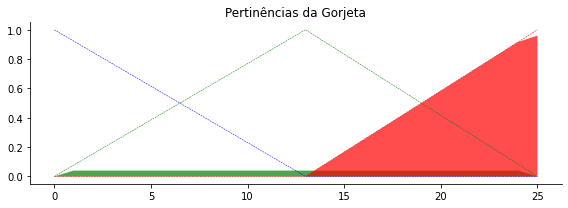

In [27]:
# SE o serviço foi alto ou a qualidade da comida era alta
regra1_ou = np.fmax(qual_level_a, serv_level_a)
# ENTÃO a gorjeta será alta.
gorj_level_a = np.fmin(regra1_ou, gorj_a)

# SE o serviço foi médio ENTÃO a gorjeta será médio
gorj_level_m = np.fmin(serv_level_m, gorj_m)

# SE o serviço era baixo e a qualidade da comida era baixo 
regra3_e = np.fmin(qual_level_b, serv_level_b)
#ENTÃO a gorjeta será baixa
gorj_level_b = np.fmin(regra3_e,gorj_b)

# Gráfico das pertinências da gorjeta
fig, ax0 = plt.subplots(figsize=(8, 3))
gor0 = np.zeros_like(x_gor)

ax0.fill_between(x_gor, gor0, gorj_level_b, facecolor='b', alpha=0.7)
ax0.plot(x_gor, gorj_b, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_gor, gor0, gorj_level_m, facecolor='g', alpha=0.7)
ax0.plot(x_gor, gorj_m, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_gor, gor0, gorj_level_a, facecolor='r', alpha=0.7)
ax0.plot(x_gor, gorj_a, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Pertinências da Gorjeta')

# removendo eixos superior e direita
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Gorjeta = 19.86871794871795 %


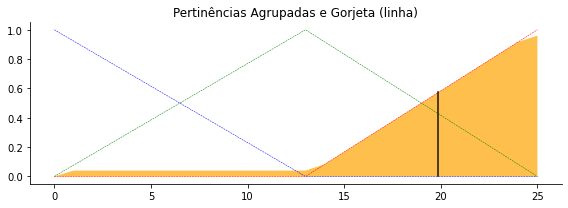

In [33]:
# agregando pertinências
agregado = np.fmax(gorj_level_b, np.fmax(gorj_level_m,gorj_level_a))

# calculando defuzzificação por centro de massa (centroide)
gorjeta = fuzz.defuzz(x_gor, agregado, 'centroid')
print('Gorjeta =',gorjeta,'%')

# visualizando centro de massa
fig, ax0 = plt.subplots(figsize=(8, 3))

gor_ativacao = fuzz.interp_membership(x_gor, agregado, gorjeta)

ax0.plot(x_gor, gorj_b, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_gor, gorj_m, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_gor, gorj_a, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_gor, gor0, agregado, facecolor='Orange', alpha=0.7)
ax0.plot([gorjeta, gorjeta], [0, gor_ativacao], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Pertinências Agrupadas e Gorjeta (linha)')

# removendo eixos superior e direita
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Problema das Reservas de Petróleo 

https://shahab.pe.wvu.edu/research/part3.htm

In [36]:
# Preço Petróleo mínimo 5, <10 baixo, =15 médio, >20 alto, máximo 30
# Reservas de petróleo mínimo 0, <5 baixo, =10 moderada, >15 alta, máximo 20
# Recuperacao de reservas mínimo =0 NR, =25 CA, =50 MA, =75 AA, máximo =100 HA

pr = ctrl.Antecedent(np.arange(5, 31, 1), 'preco') # entrada
re = ctrl.Antecedent(np.arange(0, 16, 1), 'reserva') # entrada
rc = ctrl.Consequent(np.arange(0, 101, 1), 'recuperacao') # saída

# https://shahab.pe.wvu.edu/research/Part3_files/image006.jpg
pr['baixo'] = fuzz.trapmf(pr.universe,[5,5,10,15])
pr['medio'] = fuzz.trimf(pr.universe,[10,15,20])
pr['alto'] = fuzz.trapmf(pr.universe,[15,20,30,30])

# https://shahab.pe.wvu.edu/research/Part3_files/image013.jpg
re['baixo'] = fuzz.trapmf(re.universe,[0,0,5,10])
re['moderado'] = fuzz.trimf(re.universe,[5,10,15])
re['alto'] = fuzz.trapmf(re.universe,[10,15,20,20])

# https://shahab.pe.wvu.edu/research/Part3_files/image015.jpg
rc['NR'] = fuzz.trimf(rc.universe,[0,0,25])
rc['CA'] = fuzz.trimf(rc.universe,[0,25,50])
rc['MA'] = fuzz.trimf(rc.universe,[25,50,75])
rc['AA'] = fuzz.trimf(rc.universe,[50,75,100])
rc['HR'] = fuzz.trimf(rc.universe,[75,100,100])

# https://shahab.pe.wvu.edu/research/Part3_files/image017.jpg
regra1 = ctrl.Rule(pr['alto'] & re['baixo'], rc['HR'])
regra2 = ctrl.Rule(pr['alto'] & re['moderado'], rc['AA'])
regra3 = ctrl.Rule(pr['alto'] & re['alto'], rc['MA'])
regra4 = ctrl.Rule(pr['medio'] & re['baixo'], rc['MA'])
regra5 = ctrl.Rule(pr['medio'] & re['moderado'], rc['CA'])
regra6 = ctrl.Rule(pr['medio'] & re['alto'], rc['CA'])
regra7 = ctrl.Rule(pr['alto'] & re['baixo'], rc['CA'])
regra8 = ctrl.Rule(pr['alto'] & re['moderado'], rc['NR'])
regra9 = ctrl.Rule(pr['alto'] & re['alto'], rc['NR'])

cs = ctrl.ControlSystem([regra1, regra2, regra3,
                         regra4, regra5, regra6,
                         regra7, regra8, regra9])

Recuperacao = ctrl.ControlSystemSimulation(cs)
Recuperacao

Recuperação = 51.265060240963855 %


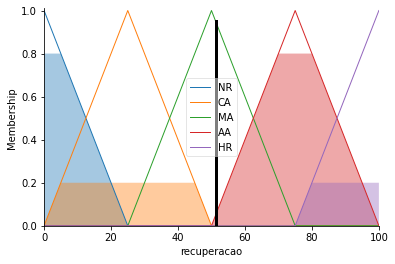

In [37]:
# https://shahab.pe.wvu.edu/research/Part3_files/image019.jpg
Recuperacao.input['preco'] = 20
Recuperacao.input['reserva'] = 9

Recuperacao.compute()

print('Recuperação =', Recuperacao.output['recuperacao'],'%')

rc.view(sim=Recuperacao)

Conclusão: o artigo desta página:
https://shahab.pe.wvu.edu/research/part3.htm
está errado! Que surpresa...